In [1]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
#import pandas as pd
import time
import warnings
from pixell import reproject
#from classy import Class

#import s1 
import ST
from PIL import Image

from matplotlib.image import pil_to_array
from scipy.integrate import trapz

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rcParams["figure.figsize"] = (6,5)

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
nside = 256

In [5]:
lmax = 3*nside -1 
res_rad = hp.nside2resol(nside, arcmin = False)
res_arcmin = hp.nside2resol(nside, arcmin = True)

In [6]:
ell = np.arange(0,lmax+1)
ellsc = 21600/ell
norm= ell * (ell+1) / (2*np.pi)

In [7]:
sky = pysm3.Sky(nside=nside, preset_strings=["d1" , "d5"])

In [8]:
map1_100GHz = sky.components[0].get_emission(100 * u.GHz)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
map1_100GHz = map1_100GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz))


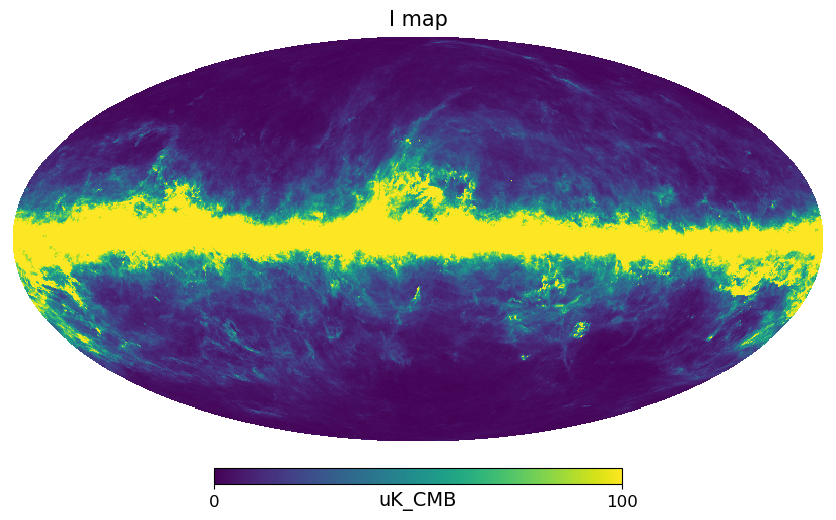

In [10]:
hp.mollview(map1_100GHz[0], min=0, max=1e2, title="I map", unit=map1_100GHz.unit)


In [11]:
map5_100GHz = sky.components[1].get_emission(100 * u.GHz)

In [12]:
map5_100GHz = map5_100GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz))


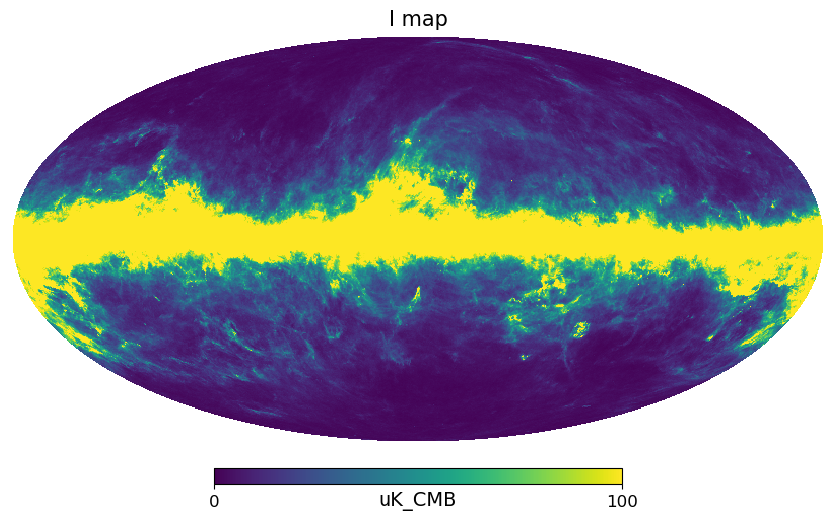

In [13]:
hp.mollview(map5_100GHz[0], min= 0, max = 100, title="I map", unit=map5_100GHz.unit)


In [16]:
dust = hp.read_map ("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_CompMap_dust-commrul_2048_R1.00.fits")
dust = hp.ud_grade(dust , nside)

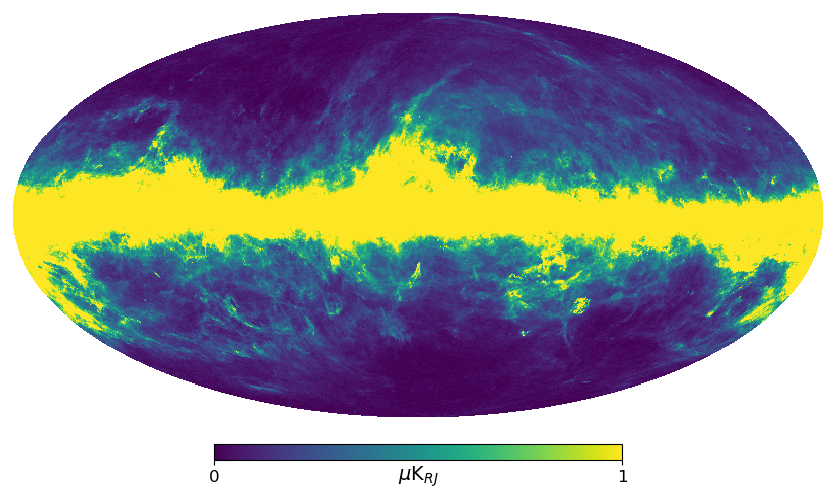

In [17]:
hp.mollview(dust , min = 0, max = 1, title ="" , cbar=True, unit=r"$\mu \mathrm{K}_{RJ}$")

In [18]:
jmax = 8

In [19]:
theta_bin = 100000
morlet_l_arr = ST.morlet_arr(res_rad , jmax , lmax , theta_bin)

In [20]:
Jf=np.arange(jmax)
scale = 2**Jf*((2*res_arcmin)/0.75)


In [21]:
dust_s0 = np.mean(np.abs(dust))

In [22]:
map1_s0 = np.mean (np.abs(map1_100GHz))

In [23]:
map5_s0 = np.mean(np.abs (map5_100GHz))

In [24]:
dust_s1, dust_i1 = ST.compS1(dust, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7


In [25]:
map1_s1, map1_i1 = ST.compS1(map1_100GHz[0], morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7


In [26]:
map5_s1, map5_i1 = ST.compS1(map5_100GHz[0], morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7


In [27]:
dust_s2, dust_i2 = ST.compS2(dust_i1/np.reshape(dust_s1,[8,1] ), morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7


In [28]:
map1_s2, map1_i2 = ST.compS2(map1_i1/np.reshape(map1_s1,[8,1] ), morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7


In [29]:
map5_s2, map5_i2 = ST.compS2(map5_i1/np.reshape(map5_s1,[8,1] ), morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7


In [30]:
dust_cl = hp.anafast(dust)

In [31]:
map1_cl = hp.anafast(map1_100GHz[0])

In [32]:
map5_cl = hp.anafast(map5_100GHz[0])

Text(0.5, 0, '$j_1$ (arcmin)')

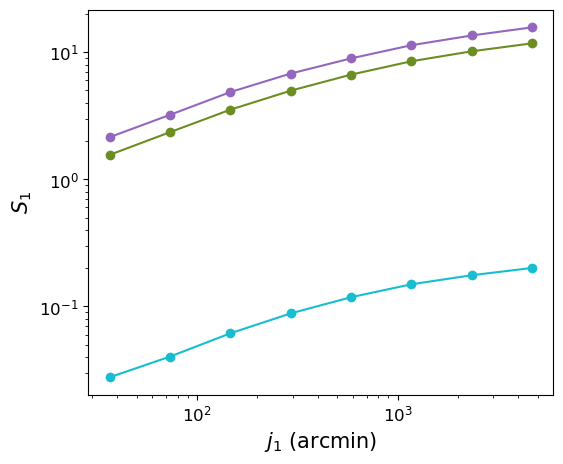

In [33]:
#plt.loglog(ellsc , dl_test)
plt.loglog(scale, dust_s1, 'o-', lw=1.5 , color = "tab:cyan")
plt.loglog (scale,map1_s1 ,'o-', lw=1.5, color = "olivedrab")
plt.loglog(scale, map5_s1, 'o-', lw=1.5 , color = "tab:purple")
plt.ylabel(r"$S_1$")
plt.xlabel(r"$j_1$ (arcmin)")
#plt.legend (["MILCA","NILC", "Websky" , "Magneticum", "Simons" ])


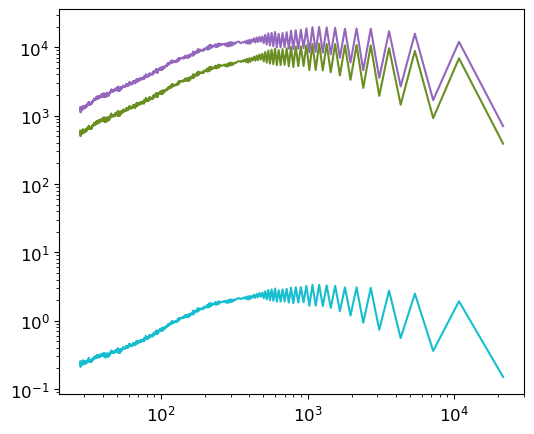

In [34]:
plt.loglog (ellsc , dust_cl*ell*(ell+1)/(2*np.pi) , color = "tab:cyan")
plt.loglog (ellsc , map1_cl*ell*(ell+1)/(2*np.pi) , color = "olivedrab")
plt.loglog (ellsc , map5_cl*ell*(ell+1)/(2*np.pi) , color = "tab:purple")


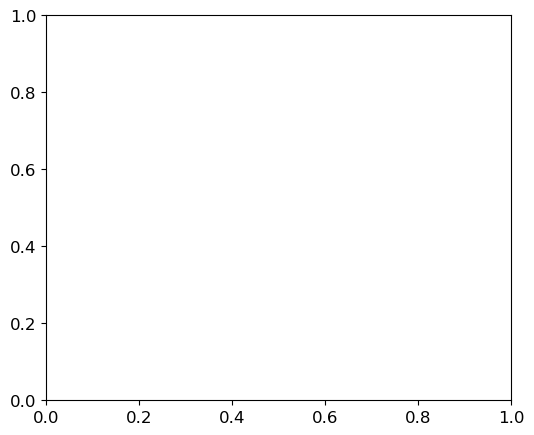

In [35]:
fig, ax = plt.subplots()
from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

    

In [36]:
dust_dl = dust_cl*ell*(ell+1)/(2*np.pi)
dust_dl[0] = 0
dust_dll = np.zeros (len(dust_dl))
for i in range (len(dust_dl)):
    dust_dll[i] = np.mean(dust_dl[i-1:i+1])

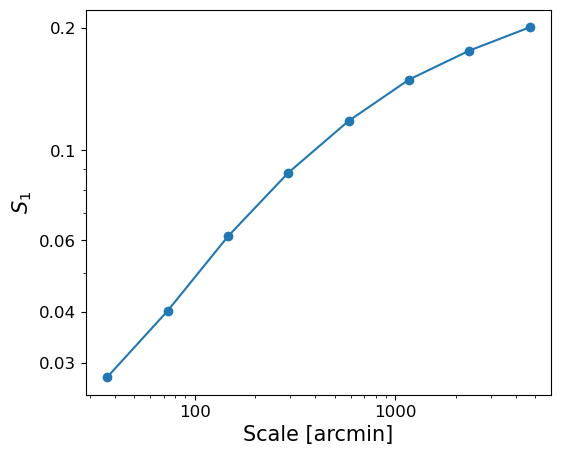

In [37]:
plt.loglog(scale, dust_s1, 'o-', lw=1.5)
plt.yticks ([0.03, 0.04,0.06 , 0.1, 0.2],[0.03, 0.04,0.06 , 0.1, 0.2])
plt.xticks ([100,  1000],[100,1000])
plt.xlabel("Scale [arcmin]")
plt.ylabel (r"$S_1$")
plt.savefig("dust_S1.pdf",bbox_inches = 'tight', pad_inches=0.1)

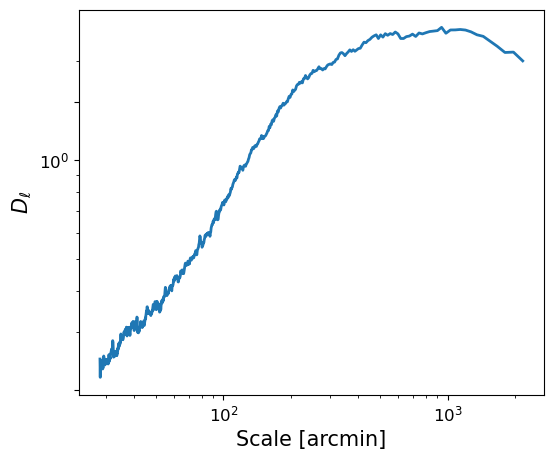

In [38]:
#fig, ax = plt.subplots()
from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
fig, ax = plt.subplots()
ax.loglog(ellsc[10:] , dust_dll[10:], lw = 2)
#plt.legend(["SZ map", "Gaussian map"])
ax.set_yticks ([0.2, 1, 1.5])
ax.set_xlabel("Scale [arcmin]")
ax.set_ylabel (r"$D_\ell$")
plt.show()

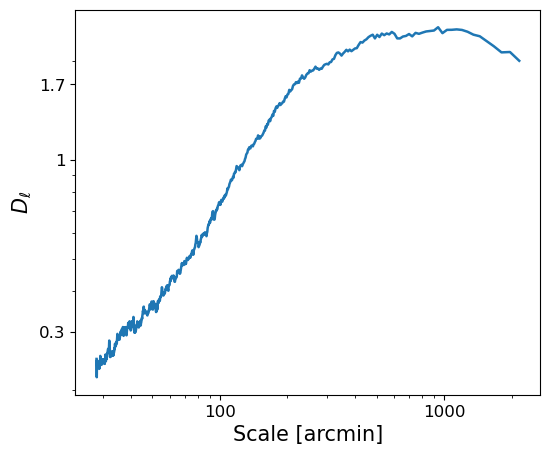

In [39]:
plt.loglog(ellsc[10:] , dust_dll[10:], lw = 1.8)
#plt.legend(["SZ map", "Gaussian map"])
plt.yticks ([0.3, 1, 1.7],[0.3,1, 1.7])
plt.xticks ([100,  1000],[100,1000])
plt.xlabel("Scale [arcmin]")
plt.ylabel (r"$D_\ell$")
plt.savefig("dust_cl.pdf",bbox_inches = 'tight', pad_inches=0.1)

In [40]:
dust_dl

array([0.        , 0.15064098, 1.91877974, 0.36120582, 2.48304311,
       0.55627443, 2.74388692, 0.73549201, 3.01760305, 0.93219542,
       3.07852575, 1.18680645, 3.06740797, 1.37729396, 3.22838829,
       1.53485884, 3.28073656, 1.63495846, 3.34329379, 1.65447136,
       3.32856867, 1.65236856, 3.21524447, 1.85877943, 3.09934458,
       1.8421744 , 3.08362443, 1.80370999, 3.04084884, 1.83591522,
       2.92336022, 1.91443285, 2.85912968, 1.89485927, 2.7965989 ,
       1.89574805, 2.95065743, 1.95895201, 2.86612601, 1.9904481 ,
       2.80818202, 2.04583944, 2.6921117 , 2.12080065, 2.57060108,
       2.24408523, 2.53557925, 2.19842621, 2.46441561, 2.158591  ,
       2.39717728, 2.17553501, 2.30730438, 2.07512324, 2.29701789,
       2.03168656, 2.25843681, 2.07945089, 2.2051786 , 2.12693831,
       2.14419496, 2.07765655, 2.08212831, 2.13481143, 2.11710715,
       2.1232153 , 2.05137276, 2.01385442, 2.03807362, 1.93962716,
       2.02986633, 1.87902211, 2.04843353, 1.86632002, 2.03223

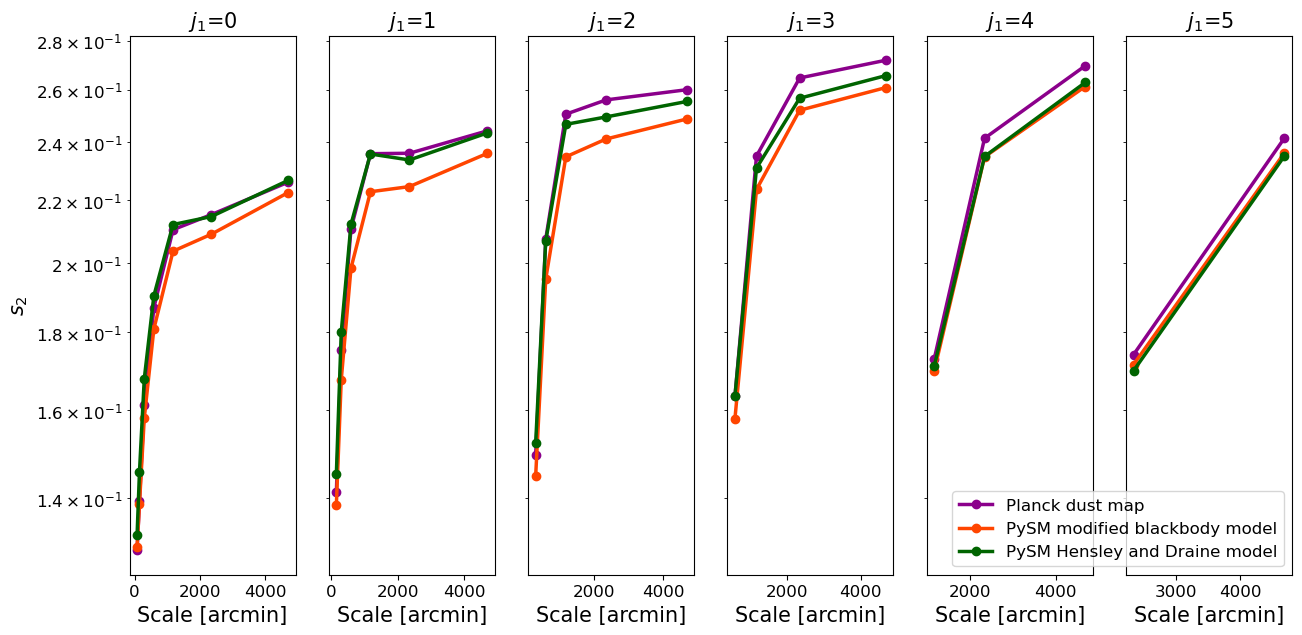

In [51]:
n = 6
fig, ax = plt.subplots(1, n,sharey=True,squeeze=True,figsize=(15,7))
for j in range (n):
    ax[j].plot (scale[j+1:],dust_s2[j,j+1:],'o-' , color = "darkmagenta" , lw = 2.5)
    ax[j].plot (scale[j+1:],map1_s2[j,j+1:],'o-' , color = "orangered" , lw = 2.5)
    ax[j].plot (scale[j+1:],map5_s2[j,j+1:],'o-' , color = "darkgreen" , lw = 2.5)
    #ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],simons_s2[j,j+1:]/simons_s1[j],'o-' , color = "darkred" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],mat_s2[j,j+1:]/mat_s1[j],'o-' , color = "pink" ,lw = 2.5)
    #ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    #ax[j].plot (scale,nilc_s2[j,:]/nilc_s1[j],'o-' ,alpha = 0.4, color = "olivedrab" )
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel("Scale [arcmin]")
    ax[j].set_yscale('log')
ax[0].set_ylabel(r"$s_2$" )
#ax[-2].legend (["Planck dust map", "PySM modified blackbody", "PySM Hensley and Draine"])
plt.legend (["Planck dust map", "PySM modified blackbody model", "PySM Hensley and Draine model"], loc = "lower right")
plt.savefig("dust_comp.pdf", bbox_inches = 'tight', pad_inches=0.1)

In [42]:
s3 = ST.compS3(dust_i2, morlet_l_arr, jmax, nside)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 2
1 3
1 4
1 5
1 6
1 7
2 3
2 4
2 5
2 6
2 7
3 4
3 5
3 6
3 7
4 5
4 6
4 7
5 6
5 7
6 7


In [43]:
map1_s3 = ST.compS3(map1_i2, morlet_l_arr, jmax, nside)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 2
1 3
1 4
1 5
1 6
1 7
2 3
2 4
2 5
2 6
2 7
3 4
3 5
3 6
3 7
4 5
4 6
4 7
5 6
5 7
6 7


In [44]:
map5_s3 = ST.compS3(map5_i2, morlet_l_arr, jmax, nside)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 2
1 3
1 4
1 5
1 6
1 7
2 3
2 4
2 5
2 6
2 7
3 4
3 5
3 6
3 7
4 5
4 6
4 7
5 6
5 7
6 7


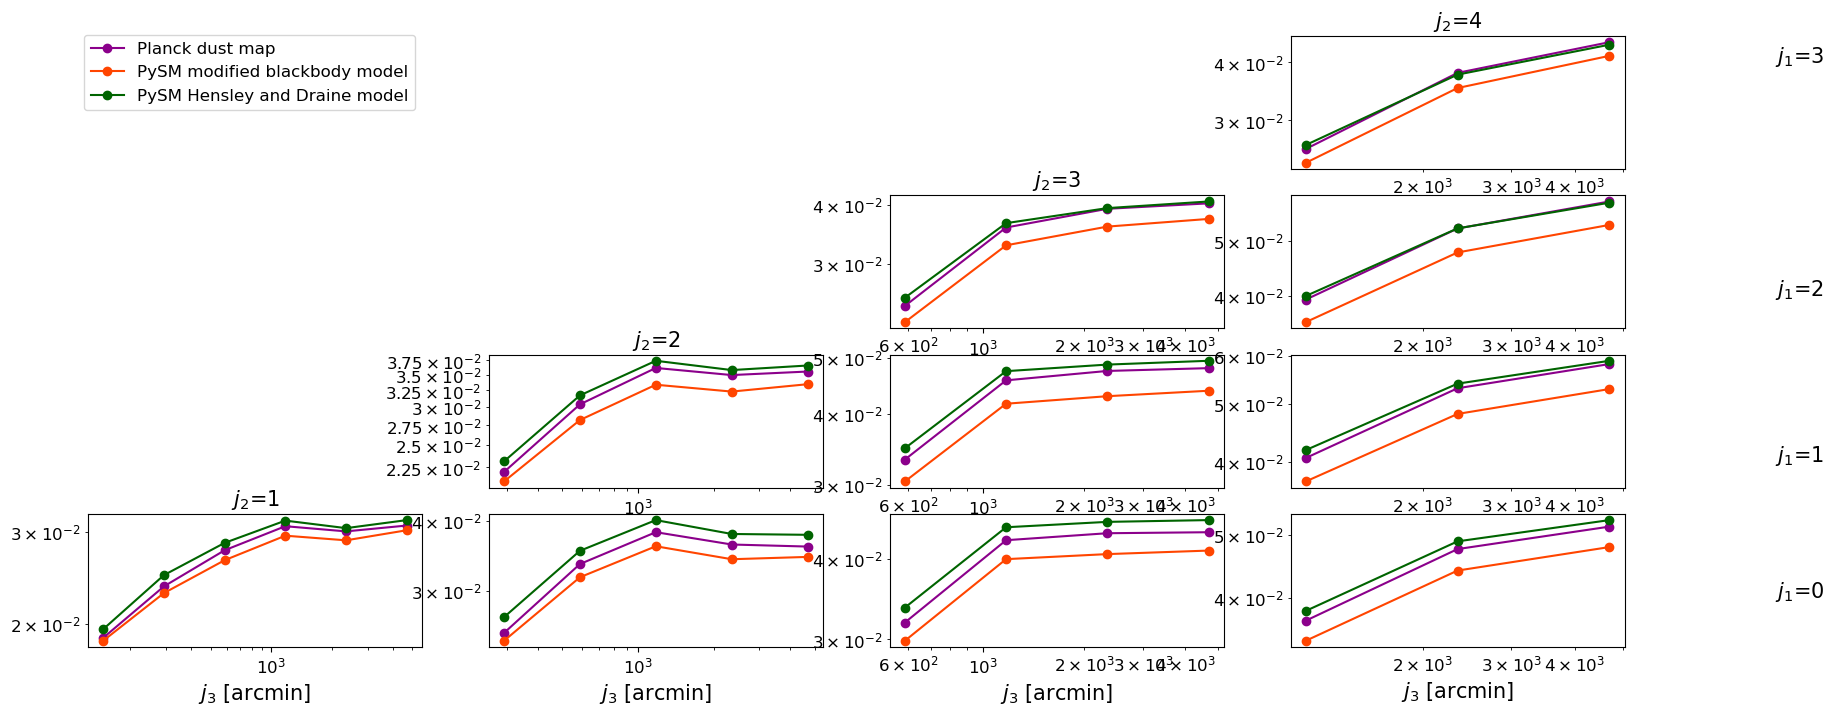

In [57]:
n = 5
fig, ax = plt.subplots(n , n,sharey=False,sharex=False,squeeze=True,figsize=(25,10))
for j1 in range (n):
    for j2 in range (j1+1 , n ):
        #print (jmax-j1-1,j2)
        ax[n-j1-1,j2].loglog (scale[j2+1:],s3[j1 , j2,j2+1:],'o-', color = "darkmagenta")
        ax[n-j1-1,j2].loglog (scale[j2+1:],map1_s3[j1 , j2,j2+1:],'o-' , color = "orangered")
        ax[n-j1-1,j2].loglog (scale[j2+1:],map5_s3[j1 , j2,j2+1:],'o-' , color = "darkgreen")
        ax[n-j2,j2].set_title(r"$j_2$=%d"%j2)
        
        #fig.delaxes(ax[])
        #ax[j1,j2].plot (scale_0256,np.log(s3_sz_0256_nofilt[j1,j2,:]),'o-')
        #ax[j1,j2].set_title("j1=%d"%j1)
        #ax[j1,j2].set_xscale('log')
        #ax[j1,j2].legend()
    #ax[j1,0:j1+1].set_visible(False)
        ax[n-1,j2].set_xlabel(r"$j_3$ [arcmin]")
    ax[n-j1-1,n-1].text(10000 , 0.04 , r"$j_1$=%d"%j1, size=15)
    #ax[5-j1-1,4].text(13000 , 0.03 , r"$j_1$=%d"%j1, size=15)
#ax[1,4].set_title(r"$j_2$=%d"%4)
for j1 in range (n):
    for j2 in range (0,j1+1):
        #print ("hoy")
        ax[n-j1-1,j2].remove()#set_visible(False)
    #ax[j].set_title(r"$j_1$=%d"%j)
    #ax[j].set_xlabel(r"$j_2$ [arcmin]")
fig.legend(["Planck dust map", "PySM modified blackbody model", "PySM Hensley and Draine model"], loc ="upper center", bbox_to_anchor=(0.1, 0.23, 0.5, 0.5))